# ÖN HAZIRLIK - LAB-6
# Ad-Soyad: Batuhan Karaoğlu
# Numara: 171024089


In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft, fftshift, ifftshift
%matplotlib notebook

# Çalışma Soruları

## 3.1 Seyrek Örnekleme
### $ x_d[n] = x[nM] $
### $ F_{s_d} = \frac{Fs}{M} $

## Örnek1.ipynb (Seyrek örneklemenin zaman domaininde incelenmesi)

<IPython.core.display.Javascript object>


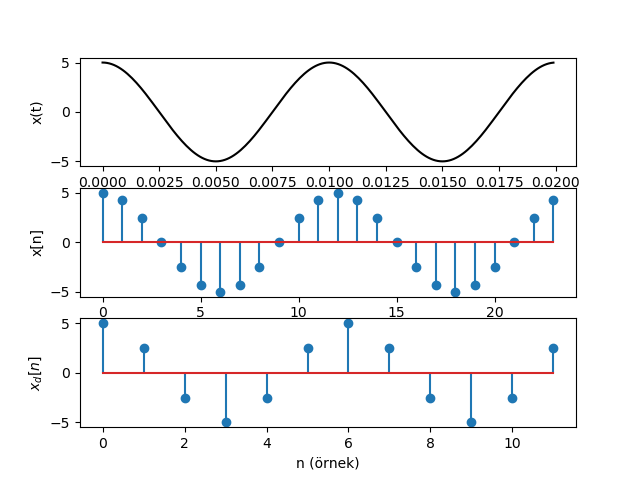

In [2]:
f=100 # x(t) işaretinin temel frekansı
T=1/f # x(t) işaretinin temel periyodu
t=np.arange(0.,2*T,0.0001) # t zaman indisinin tanımlanması(2 periyot boyunca)
x=5*np.cos(200*np.pi*t) # x(t) işaretinin tanımlanması
plt.figure()
plt.subplot(3,1,1)
plt.plot(t,x, 'black') # x(t)) işaretinin grafiğinin çizdirilmesi
plt.xlabel("t (sn)") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("x(t)") # grafiğin y ekseninin isimlendirilmesi
# x(t)=5*cos(200*pi*t) sinyalinin fs=1200 Hz ile örneklenmesi
Fs=1200 # örnekleme frekansının tanımlanması
Ts=1/Fs # örnekleme periyodunun tanımlanması
N=12 # bir periyottaki örnek sayısının tanımlanması
n=np.arange(0.,2*N) # örnekleme indisinin 0'dan iki periyot olacak şekilde array olarak tanımlanması
xn=5*np.cos(200*np.pi*n*Ts) #örneklenmiş x[n] işaretinin tanımlanması
plt.subplot(3,1,2)
plt.stem(n,xn, use_line_collection=True) # x[n] işaretinin grafiğinin çizdirilmesi
plt.xlabel("n (örnek)") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("x[n]") # grafiğin y ekseninin isimlendirilmesi
M = 2 # Seyrek örnekleme (down sampling) oranı
xn_d = xn[np.arange(0, np.size(xn, 0), M)] # x[n] işaretinden sadece M katlarındaki örneklerin alınması
Nn_d = len(xn_d)
n_d = np.arange(0,Nn_d) # x_d[n] işaretinin indis dizisi
plt.subplot(3,1,3)
plt.stem(n_d, xn_d, use_line_collection=True) # x_d[n] işaretinin grafiğinin çizdirilmesi
plt.ylabel('$x_d[n]$') # grafiğin x ekseninin isimlendirilmesi
plt.xlabel('n (örnek)') # grafiğin y ekseninin isimlendirilmesi
plt.show() # grafiklerin gösterilmesi

<IPython.core.display.Javascript object>


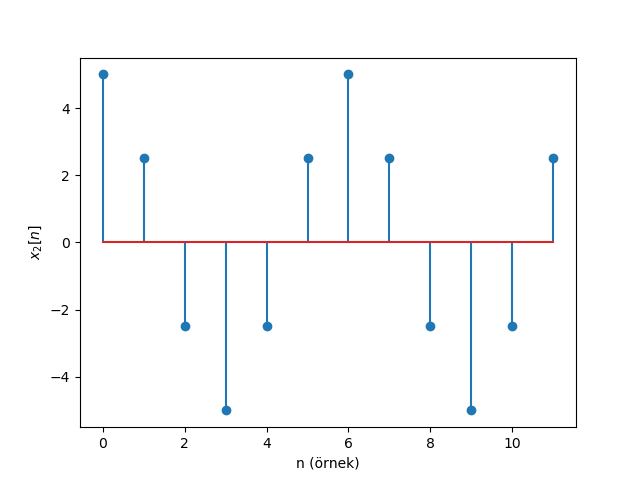

In [3]:
# x(t) işaretinin Fs=600 Hz ile örneklenmesi
Fs=600 # örnekleme frekansının tanımlanması
Ts=1/Fs # örnekleme periyodunun tanımlanması
N=6 # bir periyottaki örnek sayısının tanımlanması
n=np.arange(0.,2*N) # örnekleme indisinin 0'dan iki periyot olacak şekilde array olarak tanımlanması
xn=5*np.cos(200*np.pi*n*Ts) #örneklenmiş x[n] işaretinin tanımlanması
plt.figure()
plt.stem(n,xn, use_line_collection=True) # x[n] işaretinin grafiğinin çizdirilmesi
plt.xlabel("n (örnek)") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$x_2[n]$") # grafiğin y ekseninin isimlendirilmesi
plt.show() # grafiklerin gösterilmesi

## Örnek2.ipynb (Seyrek örneklemenin frekans domaininde incelenmesi)
### $ X_d(e^{j\omega}) = \frac{1}{M} \sum_{i=0} ^{M-1} X(e^{j(\omega/M - 2\pi i/M)}) $

seyrek örnekleme sonucunda maksimum açısal frekansın herhangi bir örtüşme olmadan yapılabilmesi için seyrek örneklemeye tabi
tutulan x[n] işaretinin maksimum bant genişliği $\frac{\pi}{M}$ kadar olmalıdır. Aksi halde örtüşme meydana gelecektir.

In [4]:
N = 80 # çizdirilmek istenen toplam örnek sayısının tanımlanması
nTs = np.arange(-10 , 10, 20/N) # nTs indislerinin tanımlanması
xn = np.sinc(nTs)**2 # x(nTs) işaretinin tanımlanması
n = np.arange(-40, 40) # x[n] işaretinin indis ekseninin tanımlanması
# x[n] işaretinin fourier transformu
w = np.arange(-np.pi, np.pi, 2*np.pi/N) # omega ekseninin -pi ile +pi arasında tanımlanması
xw = np.fft.fftshift(np.fft.fft(xn,N)/N) # ayrık zamanlı işaretin Fourier transformu

<IPython.core.display.Javascript object>


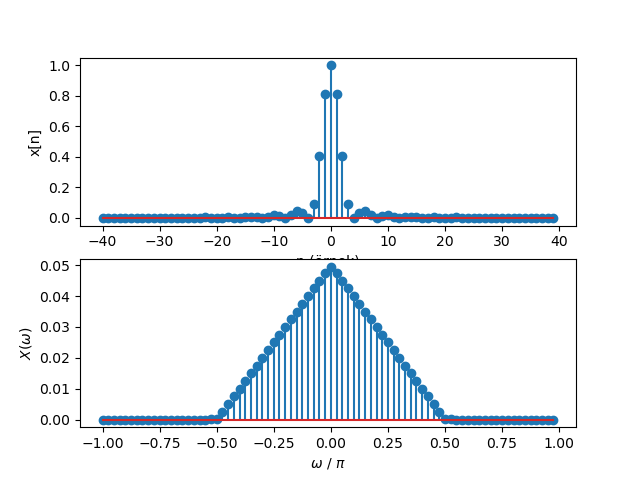

In [5]:
plt.figure()
plt.subplot(2,1,1)
plt.stem(n,xn, use_line_collection=True) # x[n] işaretinin grafiğinin çizdirilmesi
plt.xlabel("n (örnek)") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("x[n]") # grafiğin y ekseninin isimlendirilmesi
plt.subplot(2,1,2)
plt.stem(w/np.pi,abs(xw), use_line_collection=True) # X(w) işaretinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$") # grafiğin y ekseninin isimlendirilmesi
plt.show()

In [6]:
M = 2 # Seyrek örnekleme (down sampling) oranı
xn_d = xn[np.arange(0, np.size(xn, 0), M)] # x[n] işaretinden sadece M katlarındaki örneklerin alınması
N_d = (round)(N/M)
n_d = np.arange(-N_d/2,N_d/2) # x_d[n] işaretinin indis dizisi
# x_d[n] işaretinin fourier transformu
w_d = np.arange(-np.pi, np.pi, 2*np.pi/N_d) # omega ekseninin -pi ile +pi arasında tanımlanması
xw_d = np.fft.fftshift(np.fft.fft(xn_d,N_d)/N_d) # ayrık zamanlı işaretin Fourier

<IPython.core.display.Javascript object>


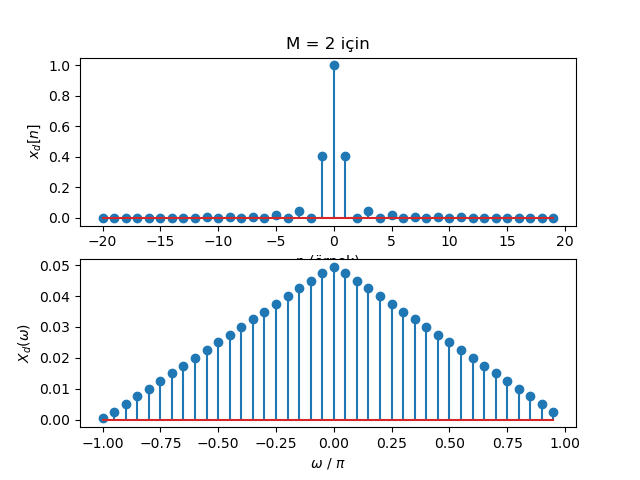

In [7]:
plt.figure()
plt.subplot(2,1,1)
plt.title('M = 2 için')
plt.stem(n_d, xn_d,use_line_collection=True) # x_d[n] işaretinin grafiğinin çizdirilmesi
plt.ylabel('$x_d[n]$') # grafiğin x ekseninin isimlendirilmesi
plt.xlabel('n (örnek)') # grafiğin y ekseninin isimlendirilmesi
plt.show() # grafiklerin gösterilmesi
plt.subplot(2,1,2)
plt.stem(w_d/np.pi,abs(xw_d), use_line_collection=True) # X_d(w) işaretinin grafiğinin çizdirilmesi
plt.xlabel('$\omega$ / $\pi$') # grafiğin x ekseninin isimlendirilmesi
plt.ylabel('$X_d(\omega)$') # grafiğin y ekseninin isimlendirilmesi
plt.show()

In [8]:
M = 3 # Seyrek örnekleme (down sampling) oranı
xn_d = xn[np.arange(0, np.size(xn, 0), M)] # x[n] işaretinden sadece M katlarındaki örneklerin alınması
N_d = (round)(N/M)
n_d = np.arange(-N_d/2,N_d/2) # x_d[n] işaretinin indis dizisi
# x_d[n] işaretinin fourier transformu
w_d = np.arange(-np.pi, np.pi, 2*np.pi/N_d) # omega ekseninin -pi ile +pi arasında tanımlanması
xw_d = np.fft.fftshift(np.fft.fft(xn_d,N_d)/N_d) # ayrık zamanlı işaretin Fourier transformu

<IPython.core.display.Javascript object>


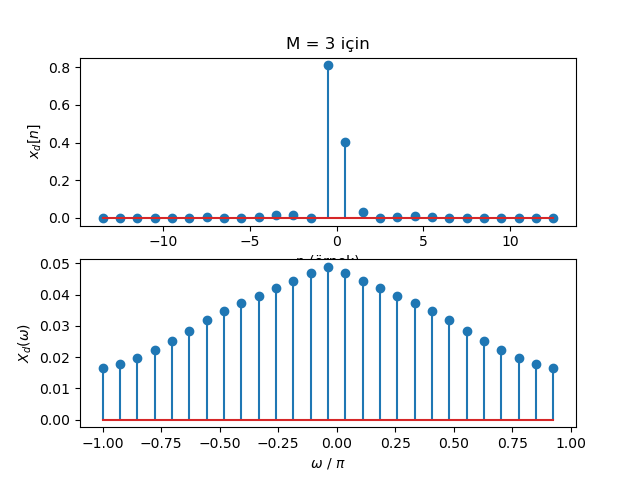

In [9]:
plt.figure()
plt.subplot(2,1,1)
plt.title('M = 3 için')
plt.stem(n_d, xn_d, use_line_collection=True) # x_d[n] işaretinin grafiğinin çizdirilmesi
plt.ylabel('$x_d[n]$') # grafiğin x ekseninin isimlendirilmesi
plt.xlabel('n (örnek)') # grafiğin y ekseninin isimlendirilmesi
plt.show() # grafiklerin gösterilmesi
plt.subplot(2,1,2)
plt.stem(w_d/np.pi,abs(xw_d), use_line_collection=True) # X_d(w) işaretinin grafiğinin çizdirilmesi
plt.xlabel('$\omega$ / $\pi$') # grafiğin x ekseninin isimlendirilmesi
plt.ylabel('$X_d(\omega)$') # grafiğin y ekseninin isimlendirilmesi
plt.show()

## Örtüşme önleyici filtre
Seyrek örneklemenin frekans domaininde incelenmesi bölümünde yer alan M=3 durumunda açıkça görüldüğü üzere işaretin sahip olduğu bant genişlik, $\frac{\pi}{M}$’den büyük ise işaretin 𝑀 ile seyrek örneklenmesi sonucu örtüşme meydana gelecek ve işaret bozulacaktır.

$X(e^{jw})$ işaretinin AGF’nin kesim frekansından büyük olan frekans değerlerinde aldığı değerler atılmıştır. Bu durum orijinal x[n] işaretinde önemli bilgilerin kaybolmasına neden olabilir. Dolayısıyla örtüşme önleyici filtrenin kullanılıp kullanılmaması durumu yapılacak olan uygulamaya ve işaretin karakteristiğine bağlı bir durumdur. Pratikteki uygulamalarda gerekli analizler yapıldıktan sonra kullanılıp kullanılmamasına karar vermek daha doğru bir yaklaşım olacaktır.

## 4- Sık Örnekleme
### $ x_u[n] = x[\frac{n}{L}] $
### $ F_{s_u} = F_s L $
Ayrık zamanlı $ x_u[n] $ çıkış işareti giriş işaretinin her örneğinin arasına $L-1$ kadar örnek eklenmesi ile elde edilir

### 4.1  Örnek3.ipynb (Sık örneklemenin zaman domaininde incelenmesi)
### $h_{lin}[n] = \{^{1-\frac{|n|}{L},  |n| \leq L} _{0, diğer}$

<IPython.core.display.Javascript object>


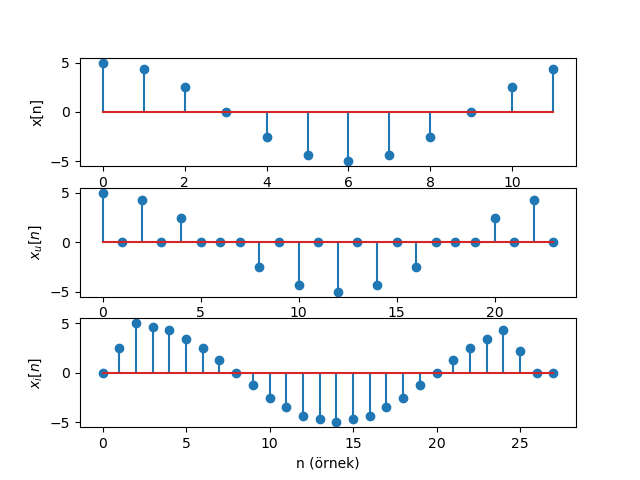

In [10]:
# x(t)=5*cos(200*pi*t) sinyalinin Fs ile örneklenmesi örneği sonucunda elde edilen x[n] işareti
Fs=1200 # örnekleme frekansının tanımlanması
Ts=1/Fs # örnekleme periyodunun tanımlanması
N=12 # örnek sayısının tanımlanması
n=np.arange(0,N) # Bir periyot için örnekleme indisinin array olarak tanımlanması
xn=5*np.cos(200*np.pi*n*Ts) #örneklenmiş x[n] işaretinin tanımlanması
plt.figure()
plt.subplot(3,1,1)
plt.stem(n,xn, use_line_collection=True) # x[n] işaretinin grafiğinin çizdirilmesi
plt.xlabel("n (örnek)")
plt.ylabel("x[n]")
L = 2 # Sık örnekleme(Up Samling)Katsayısı
Nn_u = N*L # up sample yapılmış işaret için indis array inin oluşturulması
xn_u = np.zeros(Nn_u) # 0'lar ile dolu bir dizi oluşturulması
xn_u[np.arange(0,len(xn_u),L)] = xn # 0 ile dolu dizinin üzerine L aralıklar ile x[n] işaretinin
# değerlerinin atanması
n_u = np.arange(0, Nn_u) # indis dizisi
plt.subplot(3,1,2)
plt.stem(n_u, xn_u, use_line_collection=True) # x_u[n] işaretinin grafiğinin çizdirilmesi
plt.ylabel('$x_u[n]$')
plt.xlabel('n (örnek)')
# interpolasyon işlemi
hn = np.array([0,1/2,1,1/2,0]) # lineer interpolasyonda L=2 için h[n] işareti
xn_i = np.convolve(xn_u,hn,'full') # konvolüsyon işlemi
n_i = np.arange(0, len(xn_i)) # indis dizisi
plt.subplot(3,1,3)
plt.stem(n_i,xn_i, use_line_collection=True) # x_i[n] çıkış işaretinin grafiğinin çizdirilmesi
plt.xlabel("n (örnek)")
plt.ylabel("$x_i[n]$")
plt.show() # grafiklerin gösterilmesi

### 4.2 Örnek4.ipynb (Sık örneklemenin frekans domaininde incelenmesi)

In [11]:
N = 40 # çizdirilmek istenen toplam örnek sayısının tanımlanması
nTs = np.arange(-10,10,20/40) # nTs indislerinin tanımlanması
xn = np.sinc(nTs)**2 # x(nTs) işaretinin tanımlanması
n = np.arange(-20, 20) # x[n] işaretinin indis ekseninin tanımlanması
# x[n] işaretinin fourier transformu
w = np.arange(-np.pi, np.pi, 2*np.pi/N) # omega ekseninin -pi ile +pi arasında tanımlanması
xw = np.fft.fftshift(np.fft.fft(xn,N)/N) # ayrık zamanlı işaretin Fourier transformu

<IPython.core.display.Javascript object>


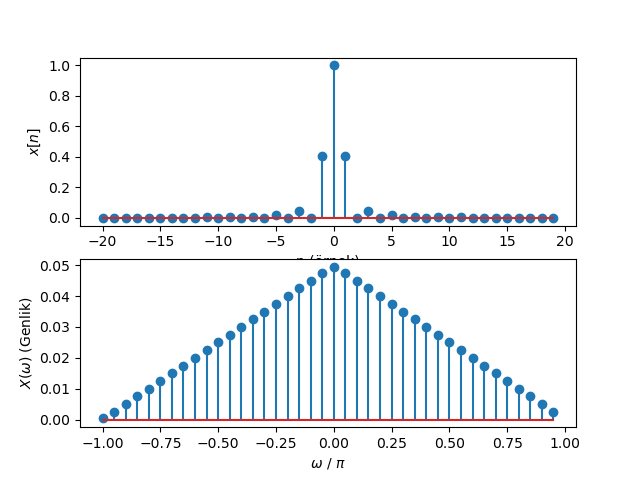

In [12]:
plt.figure()
plt.subplot(2,1,1)
plt.stem(n,xn, use_line_collection=True) # x[n] işaretinin grafiğinin çizdirilmesi
plt.xlabel("n (örnek)") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$x[n]$") # grafiğin y ekseninin isimlendirilmesi
plt.subplot(2,1,2)
plt.stem(w/np.pi,abs(xw), use_line_collection=True) # X(w) işaretinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$ (Genlik)") # grafiğin y ekseninin isimlendirilmesi
plt.show()

In [13]:
L = 2 # Sık örnekleme (up sampling) oranı
N_u = N*L # sık örnekleme sonucu elde edilecek dizinin toplam örnek miktarı
xn_u = np.zeros(N_u) # Başlangıçta N*L elemanlı 0 dizisinin oluşturulması
xn_u[np.arange(0,len(xn_u),L)] = xn # oluşturulan 0 elemanlı dizide her L katı elemana x[n] işaretinin
# elemanlarının sırasıyla atanması
n_u = np.arange(-N_u/2, N_u/2) # sık örneklenmiş işaretin indis dizisi
# x_u[n] işaretinin fourier transformu
w_u = np.arange(-(np.pi), (np.pi), 2*(np.pi)/N_u) # omega ekseninin -pi ile +pi arasında tanımlanması
xw_u = np.fft.fftshift(np.fft.fft(xn_u, N_u)/N_u) # ayrık zamanlı x_u[n] işaretin Fourier transformu

<IPython.core.display.Javascript object>


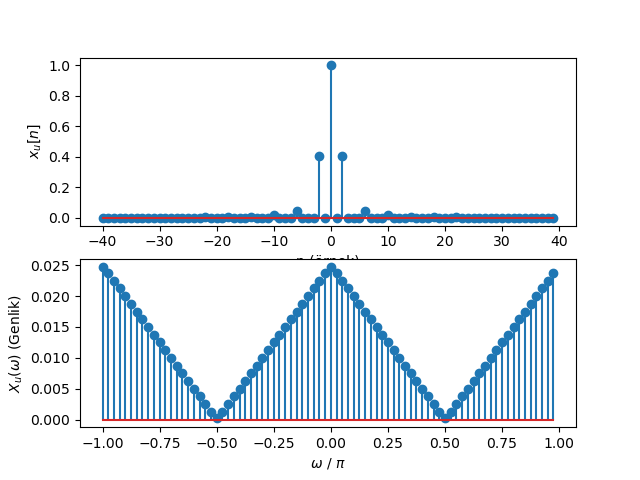

In [14]:
plt.figure()
plt.subplot(2,1,1)
plt.stem(n_u,xn_u, use_line_collection=True) # x_u[n] işaretinin grafiğinin çizdirilmesi
plt.xlabel("n (örnek)") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$x_u[n]$") # grafiğin y ekseninin isimlendirilmesi
plt.subplot(2,1,2)
plt.stem(w_u/np.pi,abs(xw_u), use_line_collection=True) # X_u(w) işaretinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X_u(\omega)$ (Genlik)") # grafiğin y ekseninin isimlendirilmesi
plt.show()

Elde edilen grafikte $x_u[n]$ işaretinde L=2 için her iki örnek arasına bir adet 0 değerli örnek eklenmektedir. $X_u(\omega)$işaretine bakıldığında ise $-\pi$ ile $-\frac{\pi}{2}$ ve $\frac{\pi}{2}$ ile $\pi$ bölgeleri arasında kalan yarım üçgen darbelerin olmaması gerekmektedir. Bu nedenle işaret frekans domaininde bir ideal alçak geçiren filtreden (AGF) geçirilecektir. İşaretin filtreleme sonrasında enerjisinin aynı kalması için AGF'nin kazancı L kadardır. Kesim frekansı ise $\frac{\pi}{L}$ 'dir. Buradaki AGF işlemi zaman domaininde işaretin ara değerlemesinin yani
interpolasyon işleminin yapılmasına karşılık gelmektedir.
NOT: Frekans domaininde ideal AGF'den geçirmek, zaman domaininde sinc(.) işareti ile konvolüsyon yapmaya karşı gelir.

In [15]:
# AGF'nin frekans cevabının oluşturulması
hw = np.zeros(N_u) # H(w) ile X_u(w) noktasal çarpılacağı için uygun boyutta başlangıçta sıfır
# vektörü oluşturulur
w_i = np.arange(-(np.pi), (np.pi), 2*(np.pi)/N_u) # açısal frekans olan w değerlerinin oluşturulması
indis = np.where(abs(w_i)<=np.pi/2) # Kesim frekansı (W_c) pi/2 olan filtrenin pi/2'den küçük
# frekanslarının indis değerlerinin bulunması
hw[indis] = L # bulunan indis değerlerine Filtre kazancına göre değer atanması

In [16]:
xw_i = xw_u*hw # X_i(w) işaretinin elde edilmesi
N_i =len(xw_i)

<IPython.core.display.Javascript object>


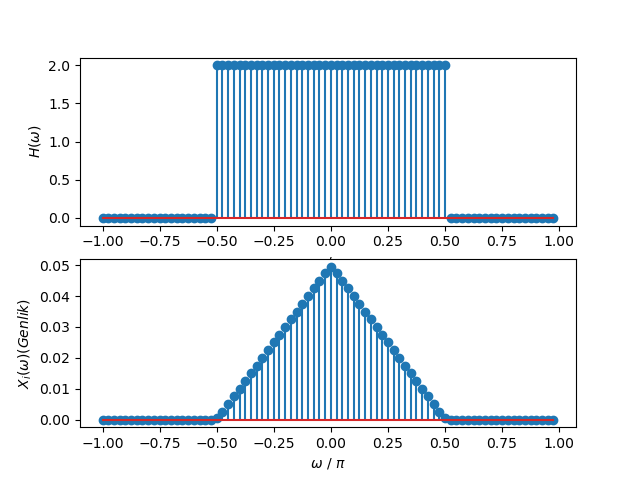

In [17]:
plt.figure()
plt.subplot(2,1,1)
plt.stem(w_i/np.pi, abs(hw), use_line_collection=True) # H(w) işaretinin (AGF) grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$H(\omega)$") # grafiğin y ekseninin isimlendirilmesi
plt.subplot(2,1,2)
plt.stem(w_i/np.pi,abs(xw_i), use_line_collection=True) # X_u(w) işaretinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X_i(\omega) (Genlik)$") # grafiğin y ekseninin isimlendirilmesi
plt.show()

In [18]:
xn_i = np.fft.ifft(np.fft.ifftshift(xw_i), N_i)*N_i # X_i(w)'dan ters Fourier dönüşümü ile x_i[n]
# işaretinin elde edilmesi
ni =np.arange(-N_i/2, N_i/2) # indis arrayi

<IPython.core.display.Javascript object>


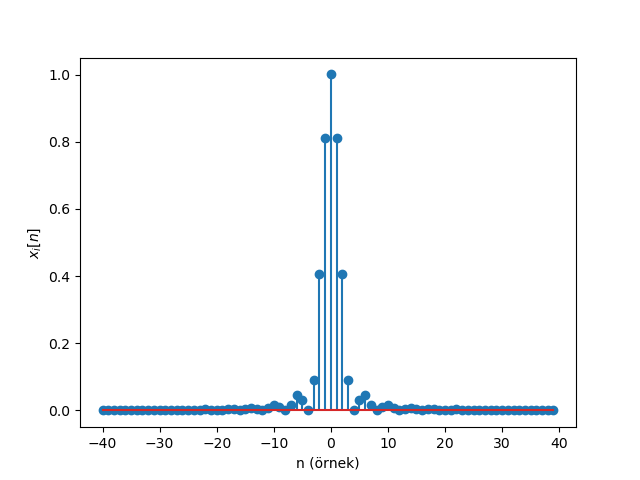

In [19]:
plt.figure()
plt.stem(ni, abs(xn_i), use_line_collection=True)
plt.xlabel("n (örnek)") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$x_i[n]$") # grafiğin y ekseninin isimlendirilmesi
plt.show()

Hem sık hem de seyrek örnekleme yapıldığı durumlarda örnekleme frekansı $\frac{FsL}{M}$ şeklinde değişmektedir.

# LAB ÖNCESİ ÇÖZÜLECEK SORULAR
## SORU-1
$x[n] = cos(\frac{\pi n}{5})$ işaretinin Fs = 40kHz ile örneklendiği bilinmektedir.

<IPython.core.display.Javascript object>


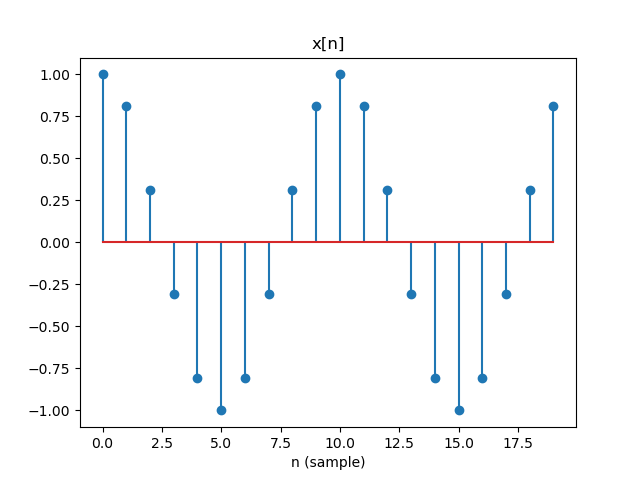

In [20]:
# x[n] işaretini toplam örnek sayısı N=20 olacak şekilde olusturalım:
pi = np.pi
N = 20
n= np.arange(0, N,1)
x_n = np.cos(pi*n/5)
plt.figure()
plt.stem(n, x_n, use_line_collection=True)
plt.xlabel("n (sample)"), plt.title("x[n]")
plt.show()

## a)
$x[n]$ işaretinin örnekleme freakansı 40kHz iken 50kHz olması için önce sık örnekleme bloğunda, $L=5$ sık örnekleme oranını seçmeliyiz. Daha sonra seyrek örnekleme bloğunda, $M=4$ seyrek örnekleme oranını seçmeliyiz. Sonuç olarak sık ve seyrek örneklenen işaretin örnekleme frekansı $\frac{40x5}{4} = 50$ kHz olur.

## b) 
Öncelikle lineer interpoalasyon sisteminin dürtü cevabı olan $h_{lin}[n]$ işaretini bulalım.
### $h_{lin}[n] = \{^{1-\frac{|n|}{L},  |n| \leq L} _{0, diğer}$
Bu örnek için sık örnekleme oranı $L = 5$ olduğundan bu çerçevede, 
### $h_{lin}[n] =\{ ^{[0,\frac{1}{5},\frac{2}{5},\frac{3}{5},\frac{4}{5},1,\frac{4}{5},\frac{3}{5},\frac{2}{5},\frac{1}{5}, 0], |n|\leq L} _{0 , diğer}$
olarak bulunur.

Şimdi $x_d[n]$ işaretini elde etmek için gerekli adımları sırasıyla yapalım.

<IPython.core.display.Javascript object>


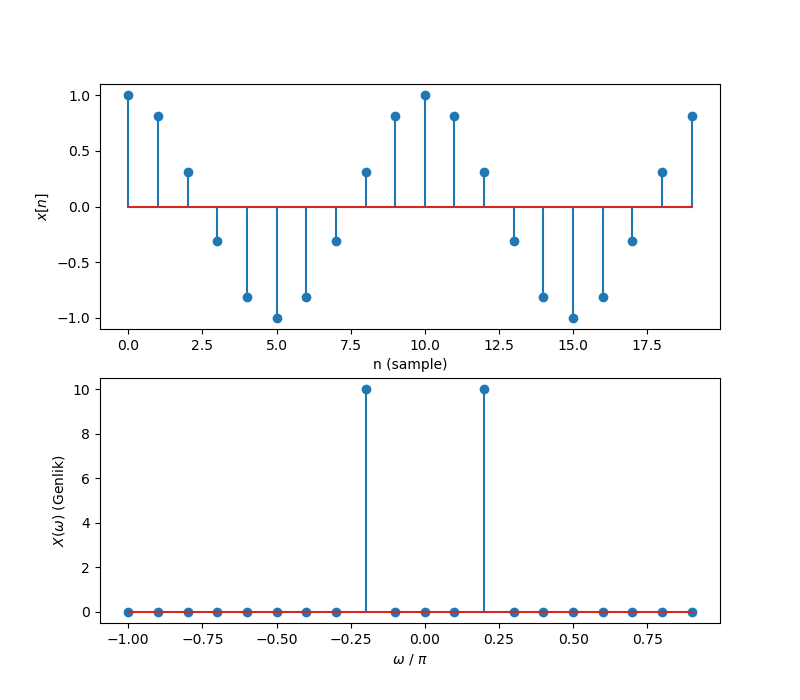

In [21]:
w = np.arange(-pi, pi, 2*pi/N)
X_w = fftshift(fft(x_n))
# x[n] işaretini zaman ve frekans uzayında çizdirelim.
plt.figure(figsize=(8,7))
plt.subplot(2,1,1)
plt.stem(n,x_n, use_line_collection=True) # x[n] işaretinin grafiğinin çizdirilmesi
plt.xlabel("n (sample)") 
plt.ylabel("$x[n]$") 
plt.subplot(2,1,2)
plt.stem(w/pi,np.abs(X_w), use_line_collection=True) # X(w) işaretinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$") 
plt.ylabel("$X(\omega)$ (Genlik)") 
plt.show()

In [22]:
# x[n] işaretinin sık örneklenmesi:
L = 5 # Sık örnekleme oranı
N_u = N*L # sık örnekleme sonucu elde edilecek dizinin toplam örnek miktarı(N=20)
x_u_n = np.zeros(N_u) # N*L elemanlı np.zeros dizisinin oluşturulması
x_u_n[np.arange(0, len(x_u_n), L)] = x_n # x_u_n dizisinde her L katı elemana x[n] işaretinin elemanlarının sırasıyla atanması
n_u = np.arange(-N_u/2, N_u/2) # sık örneklenmiş işaretin indis dizisi
# x_u[n] işaretinin frekans uzayında gösterimi:
w_u = np.arange(-pi, pi, 2*pi/N_u)
X_u_w = fftshift(fft(x_u_n))

<IPython.core.display.Javascript object>


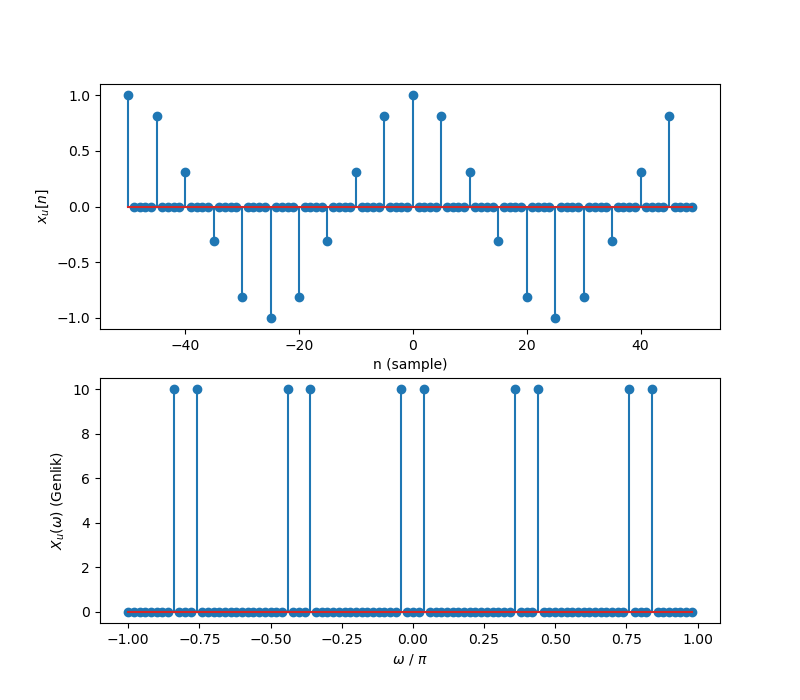

In [23]:
# Grafiklerin çizdirilmesi:
plt.figure(figsize=(8, 7))
plt.subplot(2,1,1)
plt.stem(n_u,x_u_n, use_line_collection=True) # x_u[n] işaretinin grafiğinin çizdirilmesi
plt.xlabel("n (sample)") ,plt.ylabel("$x_u[n]$") 
plt.subplot(2,1,2)
plt.stem(w_u/pi,np.abs(X_u_w), use_line_collection=True) # X_u(w) işaretinin genliğinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$"), plt.ylabel("$X_u(\omega)$ (Genlik)")
plt.show()

Beklendiği üzere sık örnekleme sırasında x[n] işaretinde her örnek arasına L-1 tane yani 4 tane sıfır eklenmiştir. Ayrıca örnek sayısı da artmıştır. Örnekleme frekansı da 40kHZ'den 200kHz'ye çıkmıştır.

Temel periyodun ise L oranında azaldığı görülmektedir. $0.20\pi$ noktasında bulunan $\delta$ işareti $0.04$ noktasına gelmiştir. Ek olarak her iki yanda da 3'er adet $\delta$ işareti, daralma olduğu için aynı periyotta görülmektedir.

In [35]:
# interpolasyon işlemi ile x_i[n]'in belirlenmesi:
h_lin = np.array([0, 1/5, 2/5, 3/5, 4/5, 1, 4/5, 3/5, 2/5, 1/5, 0]) # üçgen darbe işaretimizi(lineer int.) belirledik
# x_i[n] işaretini bulmak için x_u[n] ile h_lin[n] işaretinin konvolüsyonunu alacağız.
x_i_n = np.convolve(x_u_n, h_lin, "same")
N_i = len(x_i_n)
n_i = np.arange(-N_i/2, N_i/2) # indis dizisi
# Fourier transformu
X_i_w = fftshift(fft(x_i_n))
w_i = np.arange(-pi, pi, 2*pi/N_i)

<IPython.core.display.Javascript object>


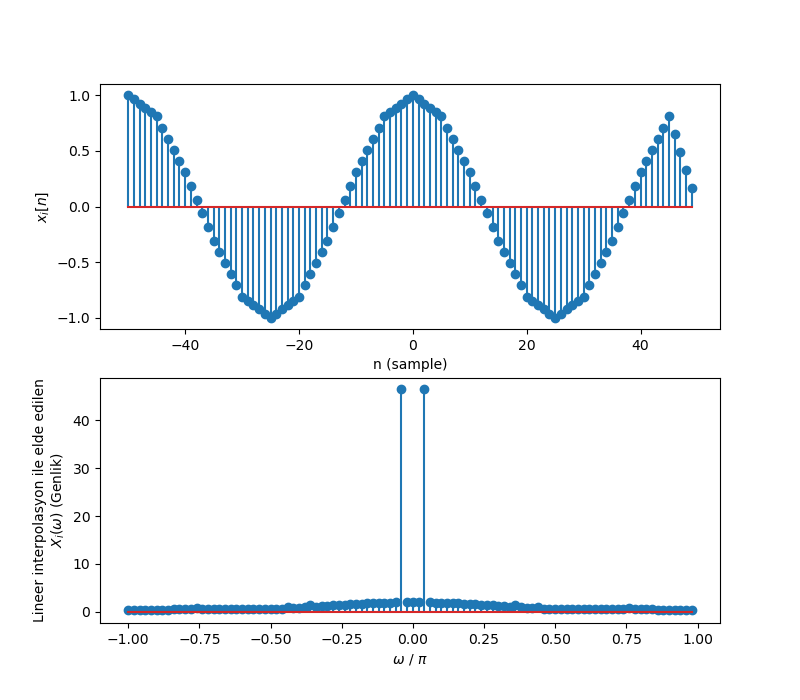

In [36]:
# x_i[n] işaretinin zaman ve freakans uzayında gösterimi:
plt.figure(figsize=(8, 7))
plt.subplot(2,1,1)
plt.stem(n_i, x_i_n, use_line_collection=True) # x_i[n] işaretinin grafiğinin çizdirilmesi
plt.xlabel("n (sample)") ,plt.ylabel("$x_i[n]$") 
plt.subplot(2,1,2)
plt.stem(w_i/pi, np.abs(X_i_w), use_line_collection=True) # X_i(w) işaretinin genliğinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$"), plt.ylabel("Lineer interpolasyon ile elde edilen\n$X_i(\omega)$ (Genlik)")
plt.show()

Lineer interpolasyon filtresi ile konvolüsyon almak demek $sinc^2(.)$ işareti ile freakans uzayında işareti çarpmak demektir. Zaman domaininde 0 olan noktaların lineer interpolasyon ile elde edildiği görülmektedir.

Freakans uzayında $sinc^2$ işaretinin etkisi görülmektedir. Ayrıca sık örnekleme sonucunda aynı periyotta görünen 6 adet $\delta$ işaretinden sadece beklediğimiz(istenilen) 2 adet $\delta$ işareti kalmıştır. Ek olarak frekans uzayında kazancımız yaklaşık L oranında artmıştır. 10 olan genlik değeri yaklaşık 46 ya çıkmıştır. Eğer ideal AGF kullansaydık bu değer tam olarak L katına çıkacaktı.

In [45]:
# x_d[n] işaretini elde etmek için seyrek örnekleme yapacağız:
M = 4 # Seyrek örnekleme oranı
x_d_n = x_i_n[np.arange(0, np.size(x_i_n, 0), M)] # x_i[n] işaretinden sadece M katlarındaki örneklerin alınması
N_d = len(x_d_n)
n_d = np.arange(-N_d/2 ,N_d/2) # x_d[n] işaretinin indis dizisi
# Fourier transformu
w_d = np.arange(-pi, pi, 2*pi/N_d)
X_d_w = fftshift(fft(x_d_n))

<IPython.core.display.Javascript object>


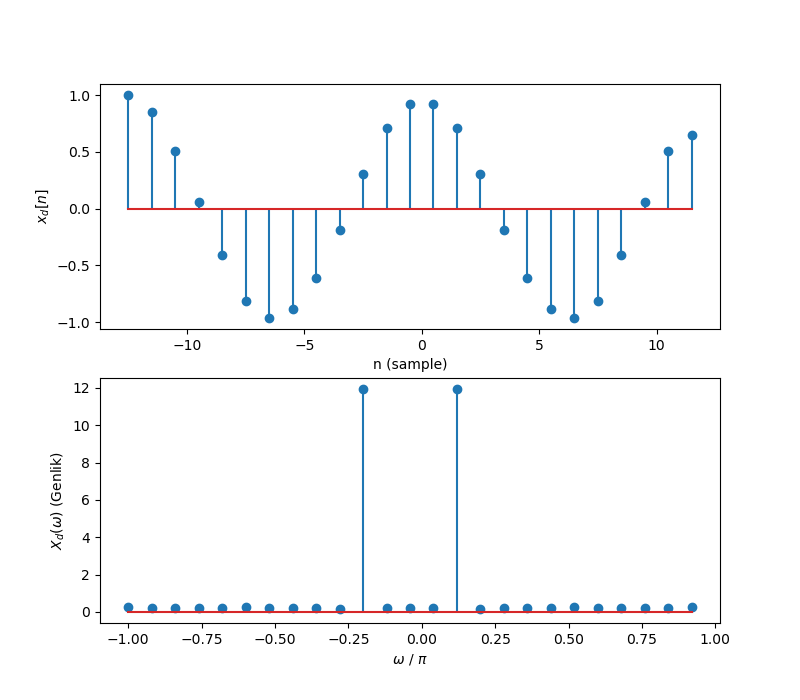

In [46]:
# x_d[n] işaretinin zaman ve freakans uzayında gösterimi:
plt.figure(figsize=(8, 7))
plt.subplot(2,1,1)
plt.stem(n_d, x_d_n, use_line_collection=True) # x_d[n] işaretinin grafiğinin çizdirilmesi
plt.xlabel("n (sample)") ,plt.ylabel("$x_d[n]$") 
plt.subplot(2,1,2)
plt.stem(w_d/pi, np.abs(X_d_w), use_line_collection=True) # X_d(w) işaretinin genliğinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$"), plt.ylabel("$X_d(\omega)$ (Genlik)")
plt.show()

Sık örneklenmiş işaretimize seyrek örnekleme yaptığımızda 200kHz olan örnekleme frekansı M=4 oranında azalmıştır. Soruda bizden istenen $F_s = 50kHz$ değerine ulaşılmıştır. Burada seyrek örneklediğimiz işaretin band genişliğinin $\frac{\pi}{4}$'ten küçük olduğu görülmektedir. Bu nedenle seyrek örnekleme sırasında örtüşme meydana gelmemiştir.

## c)
ideal AGF filtresinin kesim frekansı $\omega_c = min(\frac{\pi}{L},\frac{\pi}{M})$ ile belirlenir.

Bu çerçevede $\omega_c = \frac{\pi}{5}$ rad/sn bulunur.

İdeal AGF'nin kazancı ise L'dir. Gain=$5$ olur.

$x_d[n]$ işaretini elde etmek için gerekli adımları yapalım.

<IPython.core.display.Javascript object>


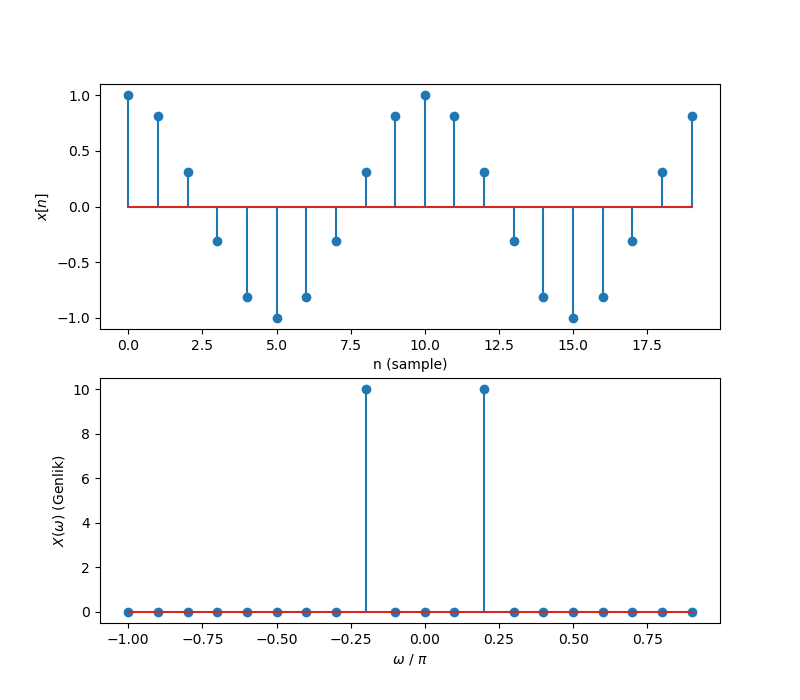

In [64]:
# x[n] işaretini zaman ve frekans uzayında çizdirelim. (Gerekli parametreler b şıkkında belirlenmişti.)
plt.figure(figsize=(8,7))
plt.subplot(2,1,1)
plt.stem(n,x_n, use_line_collection=True) # x[n] işaretinin grafiğinin çizdirilmesi
plt.xlabel("n (sample)") 
plt.ylabel("$x[n]$") 
plt.subplot(2,1,2)
plt.stem(w/pi,np.abs(X_w), use_line_collection=True) # X(w) işaretinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$") 
plt.ylabel("$X(\omega)$ (Genlik)") 
plt.show()

In [65]:
# x[n] işaretinin sık örneklenmesi:
L = 5 # Sık örnekleme oranı
N_u = N*L # sık örnekleme sonucu elde edilecek dizinin toplam örnek miktarı(N=20)
x_u_n = np.zeros(N_u) # N*L elemanlı np.zeros dizisinin oluşturulması
x_u_n[np.arange(0, len(x_u_n), L)] = x_n # x_u_n dizisinde her L katı elemana x[n] işaretinin elemanlarının sırasıyla atanması
n_u = np.arange(-N_u/2, N_u/2) # sık örneklenmiş işaretin indis dizisi
# x_u[n] işaretinin frekans uzayında gösterimi:
w_u = np.arange(-pi, pi, 2*pi/N_u)
X_u_w = fftshift(fft(x_u_n))

<IPython.core.display.Javascript object>


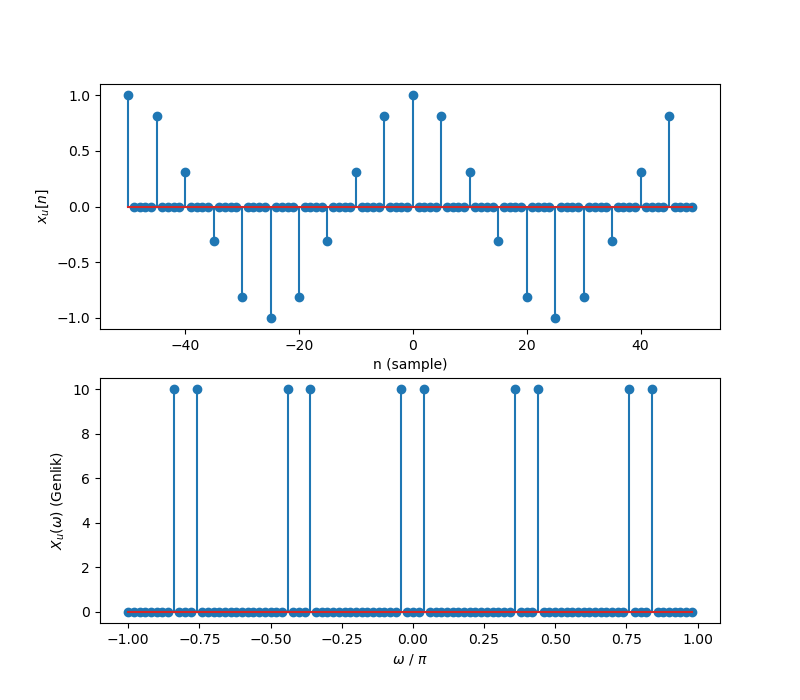

In [66]:
# Grafiklerin çizdirilmesi:
plt.figure(figsize=(8, 7))
plt.subplot(2,1,1)
plt.stem(n_u,x_u_n, use_line_collection=True) # x_u[n] işaretinin grafiğinin çizdirilmesi
plt.xlabel("n (sample)") ,plt.ylabel("$x_u[n]$") 
plt.subplot(2,1,2)
plt.stem(w_u/pi,np.abs(X_u_w), use_line_collection=True) # X_u(w) işaretinin genliğinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$"), plt.ylabel("$X_u(\omega)$ (Genlik)")
plt.show()

Buraya kadar b şıkkında bulduğumuz formatta aynı grafikleri elde ettik. Bu noktada farklı olarak $X_i[n]$ iaşretine geçerken ideal AGF kullanacağız.

<IPython.core.display.Javascript object>


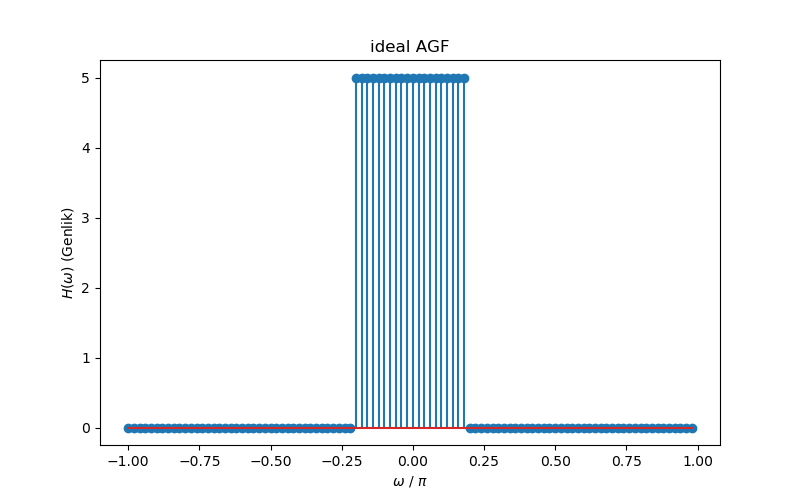

In [67]:
# Öncelikle belirlediğimiz parametrelere göre ideal AGF yi olusturalım:
w_cut = pi/L
H_w = np.array([L if i >= -w_cut and i <= w_cut else 0 for i in w_u])
# ideal AGF yi çizdirelim:
plt.figure(figsize=(8,5))
plt.stem(w_u/pi, H_w, use_line_collection=True) # H(w) filtresinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$"), plt.ylabel("$H(\omega)$ (Genlik)")
plt.title("ideal AGF")
plt.show()

<IPython.core.display.Javascript object>


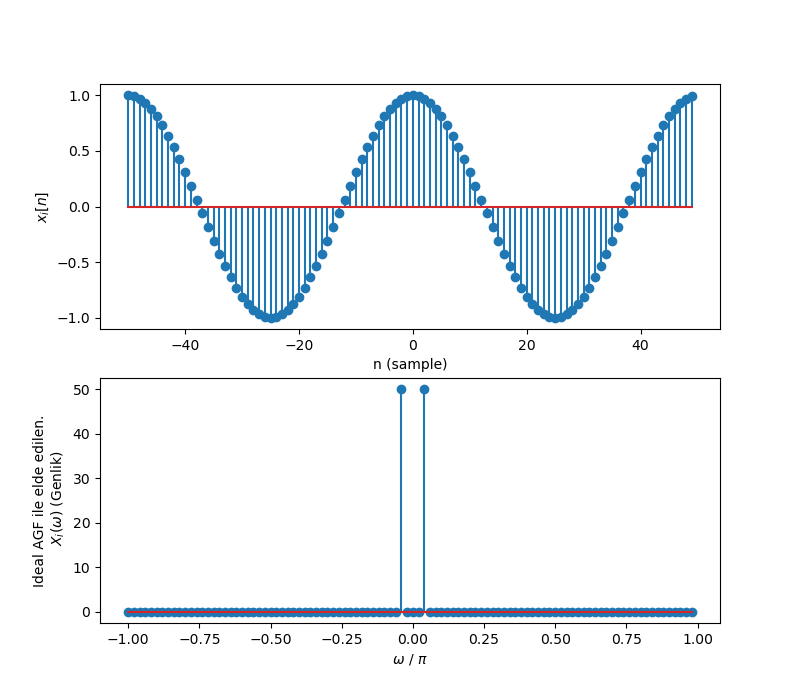

c:\users\asus\anaconda3\envs\tf15\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [68]:
# Sık örneklenen işareti ideal AGF'den geçirelim.
# Bu işlemi frekans uzayında iki işaretin çarpımı olarak gerçekleştireceğiz.
X_i_w_2 = X_u_w * H_w
N_i_2 = len(X_i_w_2)
w_i_2 = np.arange(-pi, pi, 2*pi/N_i_2)
# Ters Fourier dönüşümü alalım:
x_i_n_2 = ifft(ifftshift(X_i_w_2))
n_i_2 = np.arange(-N_i_2/2, N_i_2/2)
# ideal agf ile elde edilen x_i[n] işaretinin zaman ve freakans uzayında gösterimi:
plt.figure(figsize=(8, 7))
plt.subplot(2,1,1)
plt.stem(n_i_2, x_i_n_2, use_line_collection=True) # x_i[n] işaretinin grafiğinin çizdirilmesi
plt.xlabel("n (sample)") ,plt.ylabel("$x_i[n]$") 
plt.subplot(2,1,2)
plt.stem(w_i_2/pi, np.abs(X_i_w_2), use_line_collection=True) # X_i(w) işaretinin genliğinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$"), plt.ylabel("Ideal AGF ile elde edilen.\n $X_i(\omega)$ (Genlik)")
plt.show()

Bu kısımda sık örneklenen işareti ideal AGF den geçirdik ve beklendiği üzere $\omega = 0.04\pi$ noktasında bir $\delta$ işareti elde ettik. Görüldüğü gibi kazancımız L oranında artmıştır. Ayrıca temel periyodumuz L oranında azalmıştır.

In [69]:
# x_d[n] işaretini elde etmek için seyrek örnekleme yapacağız:
M = 4 # Seyrek örnekleme oranı
x_d_n = x_i_n_2[np.arange(0, np.size(x_i_n_2, 0), M)] # x_i[n] işaretinden sadece M katlarındaki örneklerin alınması
N_d = len(x_d_n)
n_d = np.arange(-N_d/2 ,N_d/2) # x_d[n] işaretinin indis dizisi
# Fourier transformu
w_d = np.arange(-pi, pi, 2*pi/N_d)
X_d_w = fftshift(fft(x_d_n))

<IPython.core.display.Javascript object>


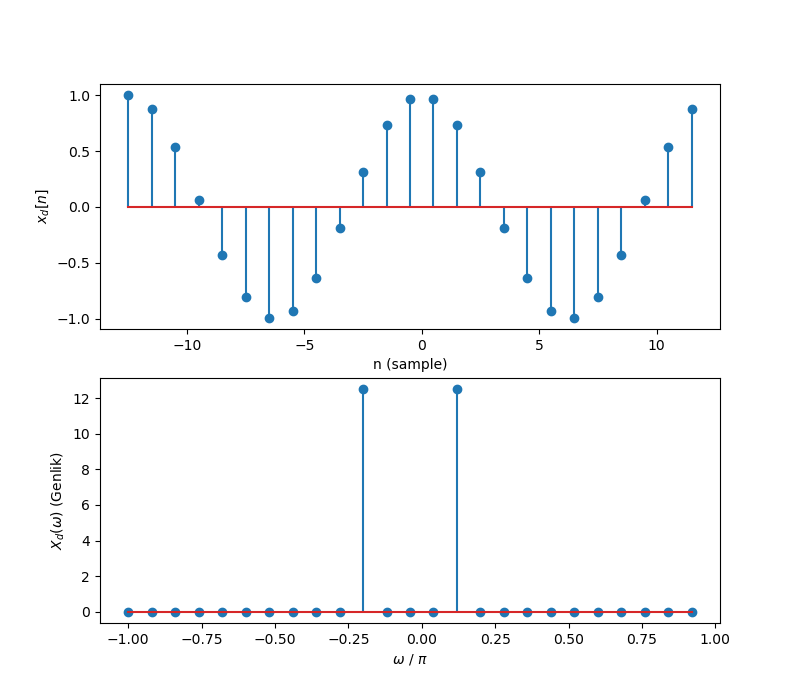

c:\users\asus\anaconda3\envs\tf15\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [70]:
# x_d[n] işaretinin zaman ve freakans uzayında gösterimi:
plt.figure(figsize=(8, 7))
plt.subplot(2,1,1)
plt.stem(n_d, x_d_n, use_line_collection=True) # x_i[n] işaretinin grafiğinin çizdirilmesi
plt.xlabel("n (sample)") ,plt.ylabel("$x_d[n]$") 
plt.subplot(2,1,2)
plt.stem(w_d/pi, np.abs(X_d_w), use_line_collection=True) # X_i(w) işaretinin genliğinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$"), plt.ylabel("$X_d(\omega)$ (Genlik)")
plt.show()

İdeal AGF den geçirdiğimiz işarete seyrek örnekleme yaparken örtüşme olmamıştır çünkü $x_i[n]$ işaretinin bant genişliği $0.04\pi$'dir. Bu değer $\frac{pi}{4}$ ten küçüktür.

b ve c şıkları sonucu bulduğumuz $X_i(\omega)$ işaretleri birbirinden farklıdır. Üçgen darbe ile konvolüsyon aldığımız b şıkkındaki işarette $sinc^2 $ işaretinin etkileri görülmektedir. İdeal AGF ile çarptığımız işaretin sonucunda oluşan ise daha net sonuç vermiştir. Fakat görüldüğü üzere b ve c şıkkı sonucunda oluşan seyrek örneklenmiş işaretler aynıdır.

## EK ÇALIŞMA

In [71]:
# x[n] işaretini tanımlayalım
xn = np.array([2, 3.2, 4, -5, -6.7, 7.8, 15])
N = len(xn) # x[n] işaretinin uzunluğu
n = np.arange(0, N, 1) 
# sistem-1 için up-sampling yapalım:
L1 = 2
Nu1 = N*L1
nu_1 = np.arange(0, Nu1, 1)
xu_n_1 =  np.zeros(Nu1) # N*L1 elemanlı np.zeros dizisinin oluşturulması
xu_n_1[np.arange(0, Nu1, L1)] = xn # xu_n_1 dizisinde her L1 katı elemana x[n] işaretinin elemanlarının sırasıyla atanması

c:\users\asus\anaconda3\envs\tf15\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


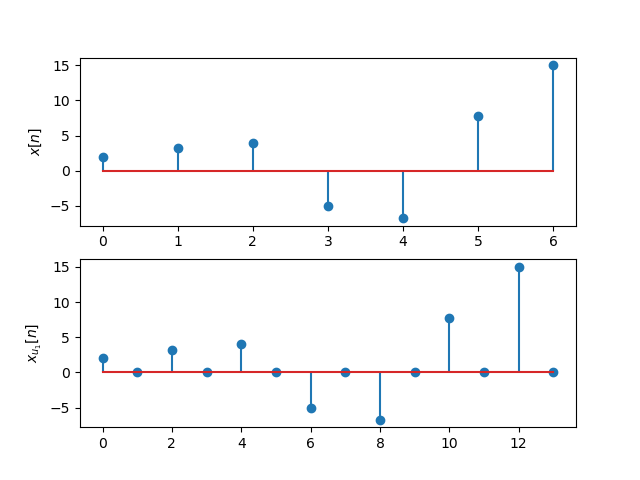

In [72]:
plt.figure()
plt.subplot(211)
plt.stem(n, xn, use_line_collection=True)
plt.ylabel("$x[n]$")
plt.subplot(212)
plt.stem(nu_1, xu_n_1, use_line_collection=True)
plt.ylabel("$x_{u_1}[n]$")
plt.show()

In [73]:
# ilk Lineer interpolasyon filtresini belirleyelim.(L1=2 için)
h_lin_1 = np.array([0, 1/2, 1, 1/2, 0])
# xi[n] işaretini bulmak için xu_1[n] ile h_lin_1[n] işaretinin konvolüsyonunu alacağız.
xi_n = np.convolve(xu_n_1, h_lin_1, "same")
Ni = len(xi_n)
ni = np.arange(0, Ni) # indis dizisi
# Fourier transformu
pi = np.pi
Xi_w = fftshift(fft(xi_n))
wi = np.arange(-pi, pi, 2*pi/Ni)

c:\users\asus\anaconda3\envs\tf15\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


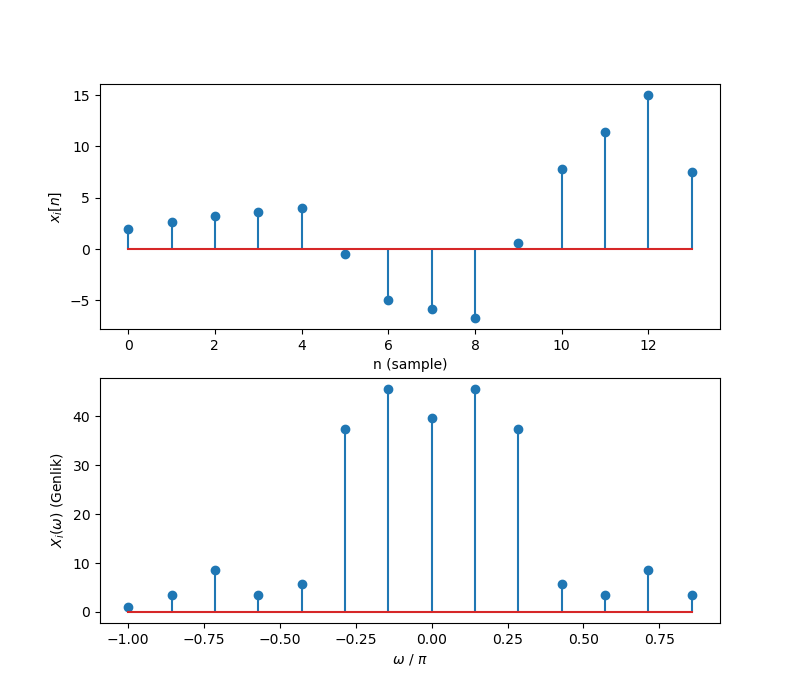

In [74]:
# grafikleri gözlemleyelim
# x_i[n] işaretinin zaman ve freakans uzayında gösterimi:
plt.figure(figsize=(8, 7))
plt.subplot(2,1,1)
plt.stem(ni, xi_n, use_line_collection=True) # x_i[n] işaretinin grafiğinin çizdirilmesi
plt.xlabel("n (sample)") ,plt.ylabel("$x_i[n]$") 
plt.subplot(2,1,2)
plt.stem(wi/pi, np.abs(Xi_w), use_line_collection=True) # X_i(w) işaretinin genliğinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$"), plt.ylabel("$X_i(\omega)$ (Genlik)")
plt.show()

In [75]:
# xi[n] işaretine L2=3 için up-sampling uygulayacağız:
L2 = 3
Nu2 = Ni*L2
nu_2 = np.arange(0, Nu2, 1)
xu_n_2 = np.zeros(Nu2) # Ni*L2 elemanlı np.zeros dizisinin oluşturulması
xu_n_2[np.arange(0, Nu2, L2)] = xi_n # xu_n_2 dizisinde her L2 katı elemana xi[n] işaretinin elemanlarının sırasıyla atanması

c:\users\asus\anaconda3\envs\tf15\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


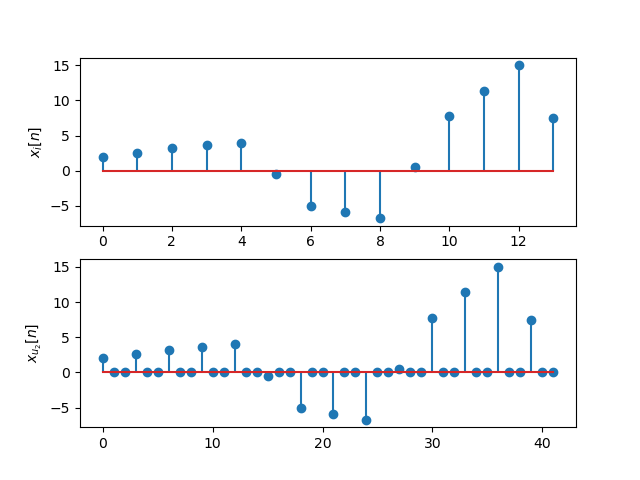

In [76]:
# grafikleri görelim
plt.figure()
plt.subplot(211)
plt.stem(ni, xi_n, use_line_collection=True)
plt.ylabel("$x_i[n]$")
plt.subplot(212)
plt.stem(nu_2, xu_n_2, use_line_collection=True)
plt.ylabel("$x_{u_2}[n]$")
plt.show()

In [77]:
# L2 = 3 için lineer interpolasyon devresini olusturalım:
h_lin_2 = np.array([0, 1/3, 2/3, 1, 2/3, 1/3, 0])
yn_1 = np.convolve(xu_n_2, h_lin_2, "same")
Ny_1 = len(yn_1)
ny_1 = np.arange(0, Ny_1) # indis dizisi
# Fourier transformu
Y_w_1 = fftshift(fft(yn_1))
wy_1 = np.arange(-pi, pi, 2*pi/Ny_1)

c:\users\asus\anaconda3\envs\tf15\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


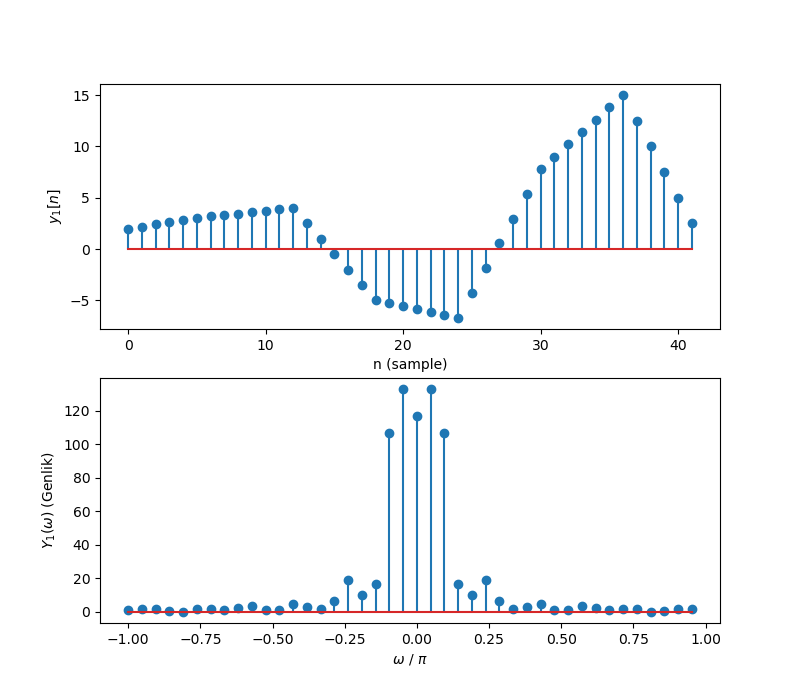

In [78]:
# y1[n] işaretinin zaman ve frekansta gösterimi:
plt.figure(figsize=(8, 7))
plt.subplot(2,1,1)
plt.stem(ny_1, yn_1, use_line_collection=True) # y_1[n] işaretinin grafiğinin çizdirilmesi
plt.xlabel("n (sample)") ,plt.ylabel("$y_1[n]$") 
plt.subplot(2,1,2)
plt.stem(wy_1/pi, np.abs(Y_w_1), use_line_collection=True) # Y_1(w) işaretinin genliğinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$"), plt.ylabel("$Y_1(\omega)$ (Genlik)")
plt.show()

In [79]:
# Sistem-2 için y2[n] işaretini elde edelim:
# sistem-2 için up-sampling yapalım:    # x[n] işareti sistem-1 için tanımlanmıştı.
L = 6
N2 = N*L
n2 = np.arange(0, N2, 1)
xu_2 =  np.zeros(N2) # N*L elemanlı np.zeros dizisinin oluşturulması
xu_2[np.arange(0, N2, L)] = xn # xu_2 dizisinde her L katı elemana x[n] işaretinin elemanlarının sırasıyla atanması

c:\users\asus\anaconda3\envs\tf15\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


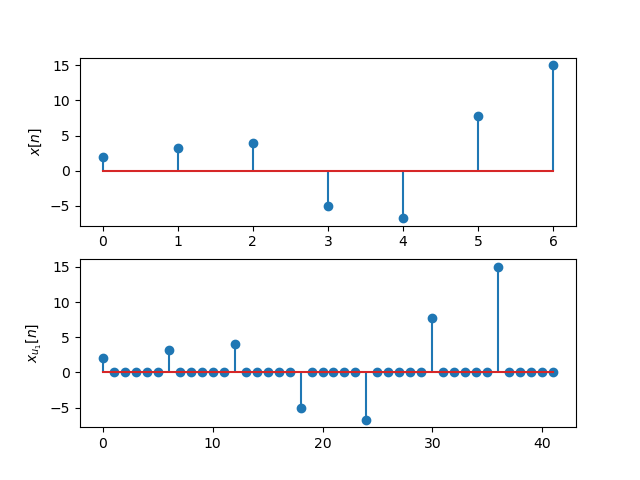

In [80]:
plt.figure()
plt.subplot(211)
plt.stem(n, xn, use_line_collection=True)
plt.ylabel("$x[n]$")
plt.subplot(212)
plt.stem(n2, xu_2, use_line_collection=True)
plt.ylabel("$x_{u_1}[n]$")
plt.show()

In [81]:
# L = 6 için lineer interpolasyon filtresini olusturalım:
h_s2_lin = np.array([0, 1/6, 2/6, 3/6, 4/6, 5/6, 1, 5/6, 4/6, 3/6, 2/6, 1/6, 0])
yn_2 = np.convolve(xu_2, h_s2_lin, "same")
Ny_2 = len(yn_2)
ny_2 = np.arange(0, Ny_2) # indis dizisi
# Fourier transformu
Y_w_2 = fftshift(fft(yn_2))
wy_2 = np.arange(-pi, pi, 2*pi/Ny_2)

c:\users\asus\anaconda3\envs\tf15\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


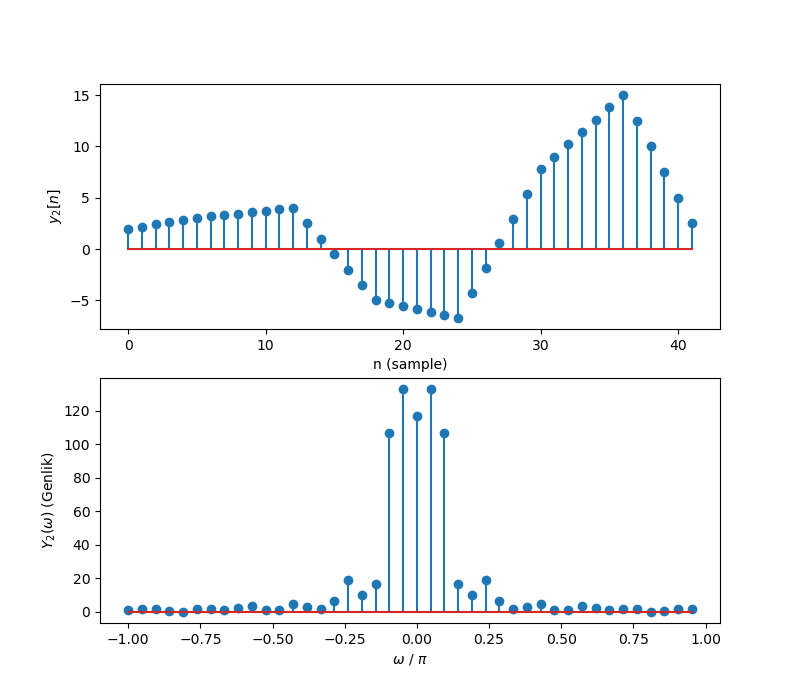

In [82]:
# y2[n] işaretinin zaman ve frekansta gösterimi:
plt.figure(figsize=(8, 7))
plt.subplot(2,1,1)
plt.stem(ny_2, yn_2, use_line_collection=True) # y_2[n] işaretinin grafiğinin çizdirilmesi
plt.xlabel("n (sample)") ,plt.ylabel("$y_2[n]$") 
plt.subplot(2,1,2)
plt.stem(wy_2/pi, np.abs(Y_w_2), use_line_collection=True) # Y_2(w) işaretinin genliğinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$"), plt.ylabel("$Y_2(\omega)$ (Genlik)")
plt.show()

iki arka arkaya L=2 ve L=3 için yapılan sık örnekleme sonucu elde edilen grafikle, L=6 için yapılan sık örnekleme sonucu oluşan işaret aynı çıkmıştır. Bu çerçevede, arka arkaya yapılan sık örneklemeler birleştirilebilir diyebiliriz.

$L_{total} = L_1*L_2$ şeklinde belirlenerek tek bir sık örnekleme bloğu oluşturulabilir. Buna göre işlemler daha kolay yapılabilir.